## More `spaCy` and `pandas`

__Load dependencies__

In [2]:
import os
import spacy
import pandas as pd
import matplotlib.pyplot as plt

# Initialize spaCy by creating a spaCy object
nlp = spacy.load("en_core_web_sm")

# Initializing spacytextblob and adding it to the pipeline
from spacytextblob.spacytextblob import SpacyTextBlob
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [2]:
type(nlp)

spacy.lang.en.English

What we did last week:

In [3]:
# Create example string
example = "This is a sentence written in English"

In [4]:
# Creating a doc with nlp object
doc = nlp(example)

In [5]:
# Iterate through the doc 
for token in doc:
    print(token.text, token.pos_, token.tag_, token.lemma_)

This DET DT this
is AUX VBZ be
a DET DT a
sentence NOUN NN sentence
written VERB VBN write
in ADP IN in
English PROPN NNP English


__Reading data with `pandas`__

When we create a doc with the nlp-object and the dataset is very large, it becomes very computationally intensive because of the immensive amount of iterations it has to do.
We can instead tell spacy to bundle together and we can do tis with pandas.

pandas can bundle up functionality to single methods, which makes it easier to work with csv-files. Pandas is a dataframe library for Python, and it is becoming one of the default tools for python data analysis. It is similar to the `tidyverse`package for R. 
With pandas we can mix different data types which is nice.

In [6]:
# Import data with pandas
in_file = os.path.join("..", "data", "labelled_data", "fake_or_real_news.csv")

In [7]:
# Create a dataframe
data = pd.read_csv(in_file)

In [8]:
# Taking a random sample of the data
data.sample(20)
# sample() uses a random number generator to take a sample from the data

,Unnamed: 0,title,text,label
3905,10384,Nigel Farage held at Heathrow on return from T...,Monday 14 November 2016 by Benedict Farkerhaus...,FAKE
2306,223,"Paul Ryan, a highway bill, and the political v...","A long-term highway bill, passed by the House ...",REAL
440,4359,"Obama seeks global climate pact in Paris, amid...",President Obama set out Monday to help seal a ...,REAL
4763,4733,5 Questions That Now Loom Over Tonight's Debate,5 Questions That Now Loom Over Tonight's Debat...,REAL
420,317,'Blue and Brave': Illinois town rallies around...,Dozens of police officers searched without suc...,REAL
4345,3752,Baltimore prosecutor charges police with murde...,One Baltimore police officer was charged Frida...,REAL
688,9102,A guide to the Paradoxroutine,A guide to the Paradoxroutine page: 1 Hah I'm ...,FAKE
5596,2694,Bernie Sanders vs. the Lamestream Media,Tuesday’s first-of-the-season Democratic debat...,REAL
4682,1581,Clinton’s 2016 makeover the latest in long lin...,"Another campaign, another reset for Hillary Cl...",REAL
1454,8366,Badass Patriot Has MASSIVE Surprise For Thieve...,Badass Patriot Has MASSIVE Surprise For Thieve...,FAKE


In [9]:
# Remove the column "unnamed: 0" 
del data["Unnamed: 0"]

In [10]:
data.sample(5)
# Now the column is gone

,title,text,label
1376,Cahill vs. Kalma Debut Album Out Now!,We Are Change \n\nThe debut album by Cahill vs...,FAKE
3197,"DOJ: Guardsman, cousin charged with supporting...",WASHINGTON -- An Illinois Army guardsman and h...,REAL
3503,"PIERS MORGAN: “Get Off Your High Horse, Hillar...",Breaking News PIERS MORGAN: “Get Off Your High...,FAKE
2715,Refusal to Acknowledge Uniqueness of Holocaust...,"Diversity Macht Frei October 27, 2016 \nThe Je...",FAKE
5466,"Fox News built a f**ked-up Frankenstein, dumb,...",Donald Trump is practically a mirror image of ...,REAL


With pandas we can finding the distribution of labels:

In [11]:
# Get a count for each value
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

__Filter on columns__

In [12]:
# Separate real and fake news by filtering on columns
# We want to know whether the label is fake or real
data["label"]=="FAKE"
# We get a true/false 

0        True
1        True
2       False
3        True
4       False
        ...  
6330    False
6331     True
6332     True
6333    False
6334    False
Name: label, Length: 6335, dtype: bool

In [13]:
data["label"]=="FAKE"

0        True
1        True
2       False
3        True
4       False
        ...  
6330    False
6331     True
6332     True
6333    False
6334    False
Name: label, Length: 6335, dtype: bool

In [14]:
# Construct a new dataset based on the above
# From original data only gives us the fake/real data
fake_news_df = data[data["label"]=="FAKE"]
real_news_df = data[data["label"]=="REAL"]

In [15]:
# Take a sample
fake_news_df.sample(10)
# Now we only have fake news

,title,text,label
5270,Exploding E-Cigarette Engulfs Man in Flames on...,posted by Eddie More evidence has emerged that...,FAKE
3306,Kind Samaritan Pays Off All Overdue Lunch Fees...,"It’s difficult to comprehend, but an estimated...",FAKE
1892,‘That’s the CRAP young people pay attention to...,‘That’s the CRAP young people pay attention to...,FAKE
3350,Thomas Frank Explores Whether Hillary Clinton ...,,FAKE
521,Election 2016 and the Weaponization of the Ame...,"Waking Times \nWith the election behind us, an...",FAKE
999,Climate Engineering And Cryosphere Collapse,geoengineeringwatch.org \nGlobal climate engin...,FAKE
3936,The Top 100 WikiLeaks That Should Destroy Hill...,BOMBSHELL AUDIO: Hillary Clinton Herself Recor...,FAKE
264,Buchanan Smashes CNN Shill,"October 27, 2016 \nI don't think it's possible...",FAKE
5056,Democratic decay,FBI reopens Hillary investigation – with evide...,FAKE
2610,Police Investigate Fraud after Voter Registrat...,Police Investigate Fraud after Voter Registrat...,FAKE


In [16]:
fake_news_df["label"].value_counts()

FAKE    3164
Name: label, dtype: int64

In [17]:
# Do the same for real
real_news_df.sample(10)
real_news_df["label"].value_counts()

REAL    3171
Name: label, dtype: int64

__Counting features in data__

How counters work:

In [18]:
counter = 0
test_list = range(0,100)

# Go through the test list and add 1 to the counter for each adjective
for entry in test_list:
    counter += entry

Applying it to fake news titles:

In [1]:
# Now we want to know how many times do adjectives appear in the headlines?
# Create adjective counters
adj_count = 0

# We want to process the data efficiently by going through it in batches which is something spaCy is good at
# Process the text titles in a batch
# We make a pipeline that we can feed data
# We process 500 at a time (this is the batch)
# For every doc in the pipe we want to find the number of adjectives
# The batch size is the number of entries in the dataframe that are being processed at a time - hence, we have 500 entries that are processed at once
for doc in nlp.pipe(fake_news_df["title"], batch_size = 500):
    print(doc)
    # Going through each token in each doc 
    for token in doc:
        # For every adjective (JJ)
        if token.tag_ == "JJ":
            # We add 1 to the adj_count for every adjective we encoutner
            adj_count += 1
            
# When we print adj_count we will see how many adjectives occur in the titles of the fake news

NameError: name 'nlp' is not defined

Why use batches?

Because it is more efficient. Instead of processing one at a time, we can process an entire batch at once. The batch size determines how many entries are processed at once.

In [20]:
print(adj_count)
# There are 1472 adjectives in the titles in the fake news

1794


## Sentiment with `spaCy`

In [21]:
text_file = os.path.join("..", "data", "100_english_novels", "corpus", "Woolf_Lighthouse_1927.txt")

In [22]:
with open(text_file, "r", encoding = "utf-8") as file:
    text = file.read()

In [23]:
print(text[:1000])

﻿To the Lighthouse


THE WINDOW


1


"Yes, of course, if it's fine tomorrow," said Mrs. Ramsay. "But you'll
have to be up with the lark," she added.

To her son these words conveyed an extraordinary joy, as if it were
settled, the expedition were bound to take place, and the wonder to which
he had looked forward, for years and years it seemed, was, after a night's
darkness and a day's sail, within touch. Since he belonged, even at the
age of six, to that great clan which cannot keep this feeling separate
from that, but must let future prospects, with their joys and sorrows,
cloud what is actually at hand, since to such people even in earliest
childhood any turn in the wheel of sensation has the power to crystallise
and transfix the moment upon which its gloom or radiance rests, James
Ramsay, sitting on the floor cutting out pictures from the illustrated
catalogue of the Army and Navy stores, endowed the picture of a
refrigerator, as his mother spoke, with heavenly bliss. It was fringe

In [24]:
doc = nlp(text)

Because the above takes a long time, we can split the text up into chunks separated by new lines (paragraph chunks) 

In [25]:
# Create empty list that we can later append to
polarity = []

for sentence in doc.sents:
    # Get sentiment score
    score = sentence._.sentiment.polarity
    # Append to list
    polarity.append(score)

In [26]:
# Look at the sentiment score for the first 10 entries
polarity[:10]

[0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.5666666666666667,
 0.4,
 -0.18333333333333332,
 0.8,
 0.4,
 0.0006926406926406867]

Plotting using matplotlib:

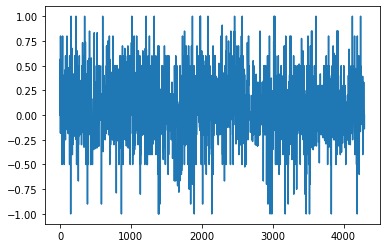

In [27]:
plt.plot(polarity)

There is a general trend of ups and downs.
We want to calculate the average over time (smoothing). We can do this using pandas. Each column in a pandas dataframe is called a "series" which is like a list, but it has more methods attached to it (it is more flexible). From the series we can create the average over a particular window which allows us to smooth. A series in pandas is basically just a list. A column in a dataframe is a series. Hence, what we call a column, pandas calls a "series". A dataframe in pandas is basically just series grouped together. A series is like a list, but it has its own methods. 

__Smoothing__

In [28]:
# Creating a series based on the polarity list with a window of 500 sentences
smoothed_sentiment = pd.Series(polarity).rolling(500).mean()
# rolling().mean() is used to calculate a rolling mean over a particular window

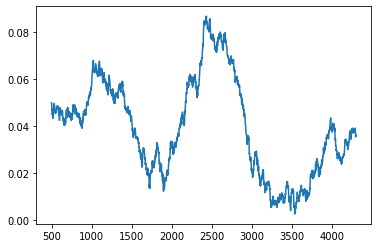

In [29]:
# Plotting the smoothed sentiment
plt.plot(smoothed_sentiment)

We can see similar ups and downs over time. The average has been smoothed and lies between 0 and 0.08. Hence, with smoothing we have filtered out noise and found a trend-line of sentimetn in the data. Using different window sizes will reveal different granularities in the data. 